# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


# Output File (CSV)
#output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_response = city_weather.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Extract the required information
        city_lat = weather_response["coord"]["lat"]
        city_lng = weather_response["coord"]["lon"]
        city_max_temp = weather_response["main"]["temp_max"]
        city_humidity = weather_response["main"]["humidity"]
        city_clouds = weather_response["clouds"]["all"]
        city_wind = weather_response["wind"]["speed"]
        city_country = weather_response["sys"]["country"]
        city_date = weather_response["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | stanthorpe
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | oakdale
Processing Record 5 of Set 1 | linqiong
Processing Record 6 of Set 1 | al kharj
Processing Record 7 of Set 1 | palasa
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | utrik
Processing Record 10 of Set 1 | tanjungtiram
Processing Record 11 of Set 1 | adrar
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | chayan
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | menongue
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | taslicay
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | puerto natales
Processing Record 23

Processing Record 38 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 39 of Set 4 | balsas
Processing Record 40 of Set 4 | kaluga
Processing Record 41 of Set 4 | jaruco
Processing Record 42 of Set 4 | nagqu
Processing Record 43 of Set 4 | vernon
Processing Record 44 of Set 4 | zouerate
Processing Record 45 of Set 4 | wagar
Processing Record 46 of Set 4 | hermanus
Processing Record 47 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 48 of Set 4 | sao vicente
Processing Record 49 of Set 4 | coyhaique
Processing Record 0 of Set 5 | timmins
Processing Record 1 of Set 5 | sitka
Processing Record 2 of Set 5 | kalemie
Processing Record 3 of Set 5 | yeppoon
Processing Record 4 of Set 5 | matoury
Processing Record 5 of Set 5 | mhamid
Processing Record 6 of Set 5 | selfoss
Processing Record 7 of Set 5 | yondo
Processing Record 8 of Set 5 | susuman
Processing Record 9 of Set 5 | fort bragg
Processing Record 10 of Set 5 | al hudaydah
Processing Record 1

Processing Record 33 of Set 8 | vincennes
Processing Record 34 of Set 8 | tabou
Processing Record 35 of Set 8 | alotau
City not found. Skipping...
Processing Record 36 of Set 8 | minab
Processing Record 37 of Set 8 | benalla
Processing Record 38 of Set 8 | mejit
Processing Record 39 of Set 8 | mawlaik
Processing Record 40 of Set 8 | galle
Processing Record 41 of Set 8 | tobelo
Processing Record 42 of Set 8 | san fernando de apure
Processing Record 43 of Set 8 | east london
Processing Record 44 of Set 8 | karatau
Processing Record 45 of Set 8 | melfort
Processing Record 46 of Set 8 | chilaw
Processing Record 47 of Set 8 | masbate
Processing Record 48 of Set 8 | ar rutbah
Processing Record 49 of Set 8 | bandar lampung
Processing Record 0 of Set 9 | ennis
Processing Record 1 of Set 9 | polyarnyy
Processing Record 2 of Set 9 | mermoz boabab
Processing Record 3 of Set 9 | letterkenny
Processing Record 4 of Set 9 | wingham
Processing Record 5 of Set 9 | lospalos
Processing Record 6 of Set 9 

Processing Record 19 of Set 12 | sauri
Processing Record 20 of Set 12 | khem karan
Processing Record 21 of Set 12 | parol
Processing Record 22 of Set 12 | kalecik
Processing Record 23 of Set 12 | naze
Processing Record 24 of Set 12 | labytnangi
Processing Record 25 of Set 12 | reggane
Processing Record 26 of Set 12 | quellon
Processing Record 27 of Set 12 | svislach
Processing Record 28 of Set 12 | nevel'sk
Processing Record 29 of Set 12 | lorengau
Processing Record 30 of Set 12 | nguigmi
Processing Record 31 of Set 12 | uyuni
Processing Record 32 of Set 12 | port augusta
Processing Record 33 of Set 12 | queenstown
Processing Record 34 of Set 12 | ola
Processing Record 35 of Set 12 | ponoka
Processing Record 36 of Set 12 | general villegas
Processing Record 37 of Set 12 | macau
Processing Record 38 of Set 12 | lucera
Processing Record 39 of Set 12 | bac lieu
Processing Record 40 of Set 12 | bamboo flat
Processing Record 41 of Set 12 | kristiansund
Processing Record 42 of Set 12 | mayen

In [45]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

city_data_df.count()


City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [46]:


#Extract relevant fields for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,-34.23,94,31,2.87,RU,1705128383
1,stanthorpe,-28.6667,151.9500,24.68,69,100,4.99,AU,1705128383
2,port-aux-francais,-49.3500,70.2167,7.02,91,73,10.79,TF,1705128383
3,oakdale,44.9630,-92.9649,-10.18,85,100,8.75,US,1705128174
4,linqiong,30.4159,103.4609,13.90,52,88,1.60,CN,1705128385


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-34.23,94,31,2.87,RU,1705128383
1,stanthorpe,-28.6667,151.9500,24.68,69,100,4.99,AU,1705128383
2,port-aux-francais,-49.3500,70.2167,7.02,91,73,10.79,TF,1705128383
3,oakdale,44.9630,-92.9649,-10.18,85,100,8.75,US,1705128174
4,linqiong,30.4159,103.4609,13.90,52,88,1.60,CN,1705128385


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

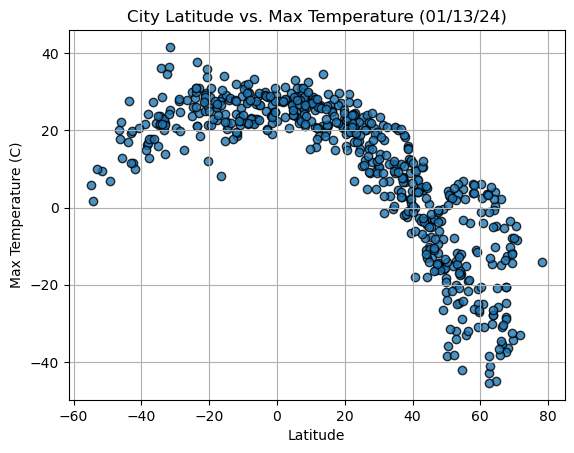

In [49]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=lats, y=max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

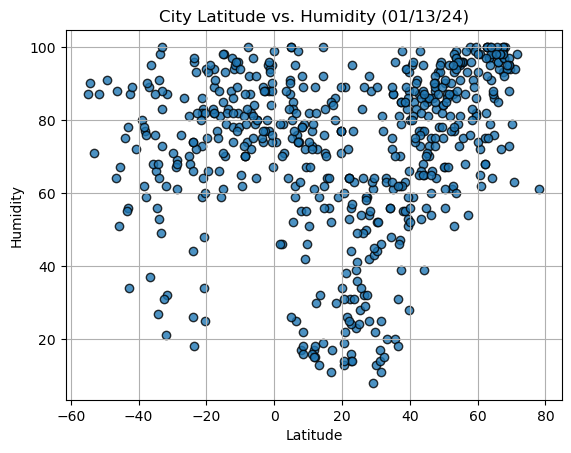

In [50]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=lats, y=humidity, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

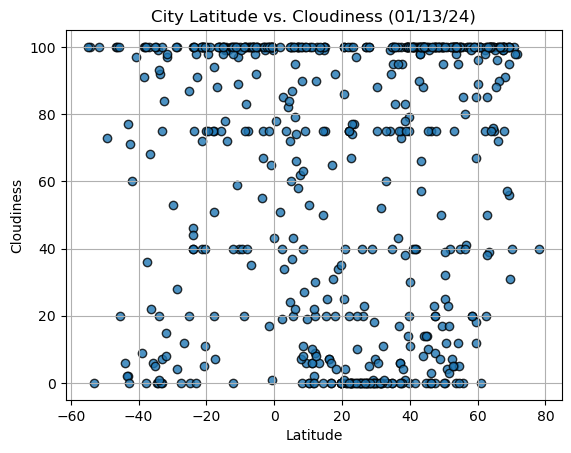

In [51]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=lats, y=cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

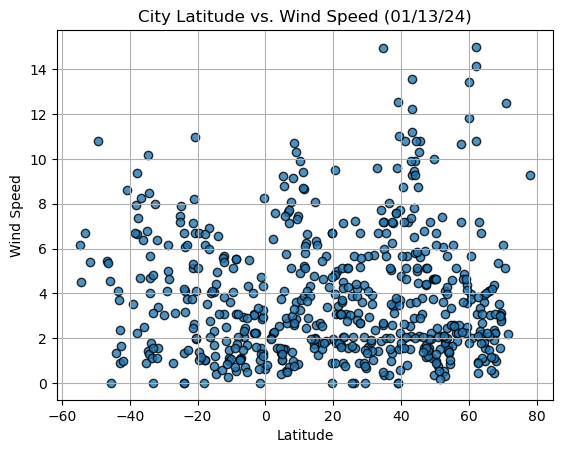

In [52]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=lats, y=wind_speed, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f'{y_label}')
    plt.grid()

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-34.23,94,31,2.87,RU,1705128383
3,oakdale,44.9630,-92.9649,-10.18,85,100,8.75,US,1705128174
4,linqiong,30.4159,103.4609,13.90,52,88,1.60,CN,1705128385
5,al kharj,24.1550,47.3346,17.32,23,97,5.15,SA,1705128385
6,palasa,18.7667,84.4167,27.03,59,34,4.28,IN,1705128386


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stanthorpe,-28.6667,151.9500,24.68,69,100,4.99,AU,1705128383
2,port-aux-francais,-49.3500,70.2167,7.02,91,73,10.79,TF,1705128383
7,waitangi,-43.9535,-176.5597,17.12,75,6,1.34,NZ,1705128386
14,grytviken,-54.2811,-36.5092,1.66,90,100,4.49,GS,1705128389
16,menongue,-14.6585,17.6910,20.45,70,99,4.40,AO,1705128390


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8568576522539109
y = -0.84x + 35.4


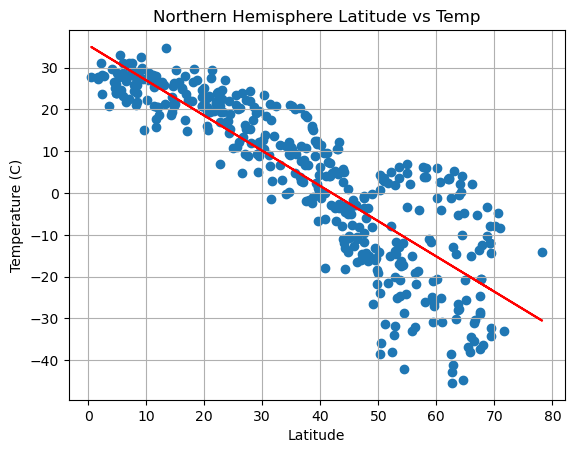

In [56]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (C)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Temp.png")
plt.show()

The r-square is 0.4499986303863654
y = 0.2x + 28.14


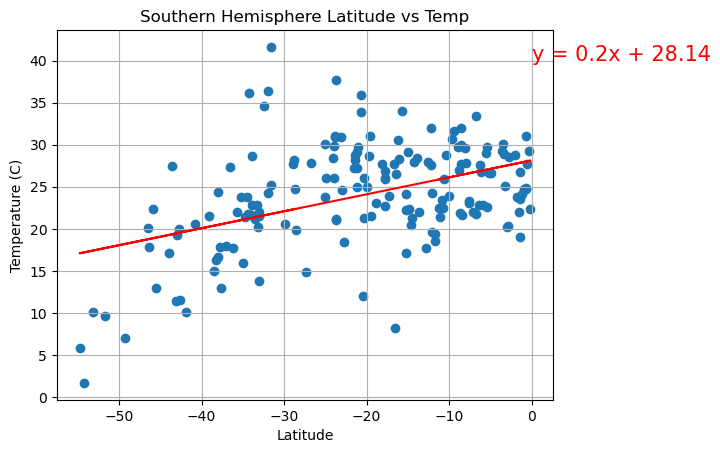

In [57]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (C)"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Temp.png")
plt.show()

**Discussion about the linear relationship:** The result reveals a strong correlation (negative sloping in the Northern Hemisphere and positive sloping in the Southern) between distance from the equator temperature. The closer to the equator, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.46906330834286103
y = 0.58x + 48.62


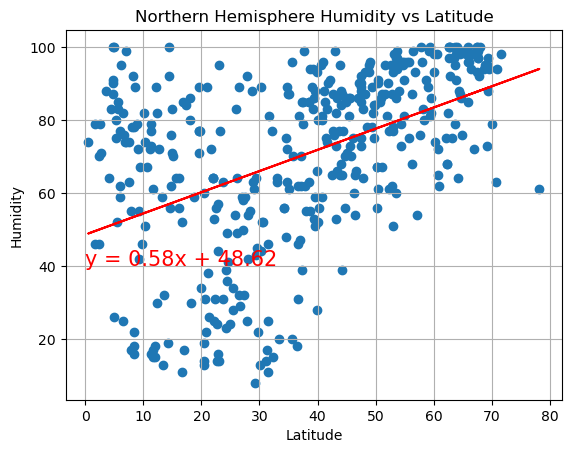

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Northern Hemisphere Humidity vs Latitude')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Humidity.png")
plt.show()

The r-square is 0.28351297285809846
y = 0.34x + 83.31


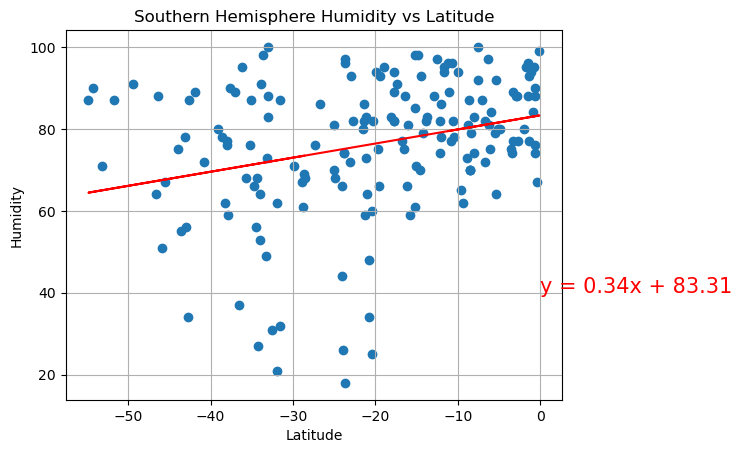

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Southern Hemisphere Humidity vs Latitude')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Humidity.png")
plt.show()

**Discussion about the linear relationship:** With low r-squares (0.39) and slopes of only 0.44 and 0.45, there does not appear to be any particular correlation between randomly chosen cities' humidity and their latitudes; humidity in the Northern and Southern hemispheres does seem to be weakly correlated with a slight rise as cities get closer to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.2877937358415278
y = 0.61x + 35.5


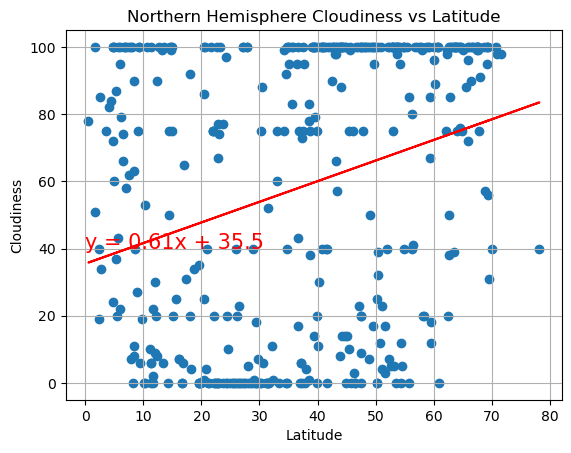

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Northern Hemisphere Cloudiness vs Latitude')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Cloudiness.png")
plt.show()

The r-square is 0.310480937337654
y = 0.82x + 88.08


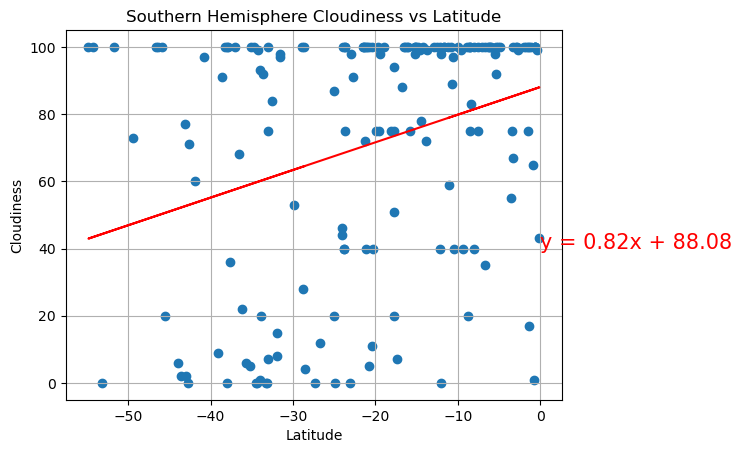

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Southern Hemisphere Cloudiness vs Latitude')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Cloudiness.png")
plt.show()

**Discussion about the linear relationship:** The result reveals a very weak correlation between latitude and cloudiness in both the Northern or Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is -0.012841915406315296
y = -0.0x + 4.03


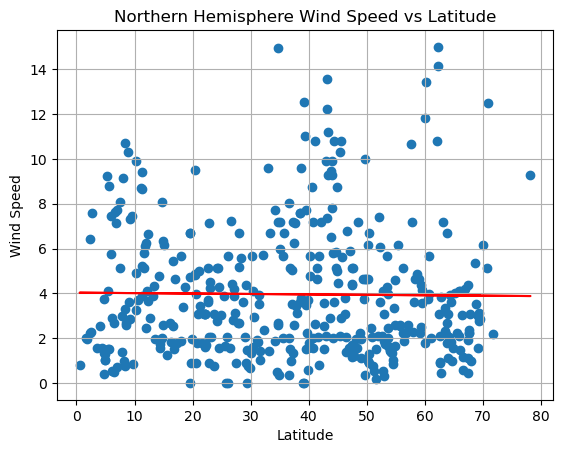

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Northern Hemisphere Wind Speed vs Latitude')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Wind Speed.png")
plt.show()

The r-square is -0.3333224223950291
y = -0.06x + 2.35


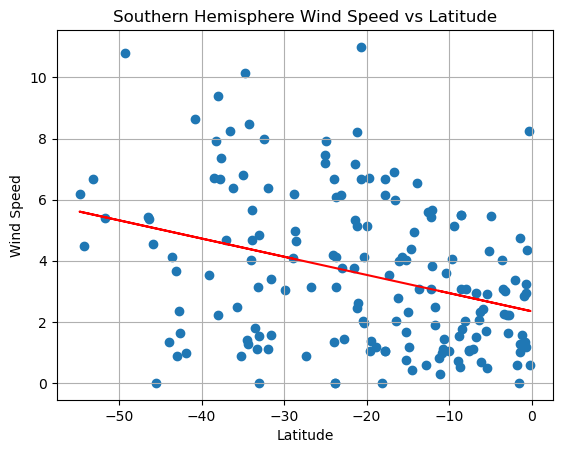

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Southern Hemisphere Wind Speed vs Latitude')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Wind Speed.png")
plt.show()

**Discussion about the linear relationship:** The result reveals no correlation between latitude and wind speed.

In [64]:
See above for linear regression observations based on data after each (northern and southern hemisphere) scatter plots.

There is a strong, negative correlation between a city's latitude (as we go north and thus latitude increases, max temps decrease) and maximum temperature in the northern hemisphere. 
    The farther away from the equator (latitude increases in the N), a city's maximum temperature will generally be lower than cities closer to the equator in the northern hemisphere (which is to be expected).
    In the southern hemisphere, this same type of correlation exists; however, it should be remembered for all these plotted charts, that southern hemisphere negative latitudes are increasing/approaching 0, as latitudes are "negative". Basically, the greater the absolute value of the latitude, the colder the maximum temperature.

There is an extremely weak, positive correlation between cloudiness and a city's latitude for both the northern and southern hemispheres. 
    This is represented in the scatter plots in this notebook for those two factors as the data points are scattered all across the scatter plot graphs. 
    As a result, we can conclude that a city's latitude has little to no influence on a city's cloudiness.

There is also a weak, barely positive/negative correlations depending on the specific cities selected from random for the dataset for the northern hemisphere between a city's latitude and wind speed (mph).
    Meanwhile, in the southern hemisphere, there is a very weak, negative correlation for those same two factors. These slight correlations could be due to northern vs. southern disparate (opposite) and severity of seasons at any given time of year.  
    
Overall, for both hemispheres, latitude has a small influence on wind speed but not one of any statistical significance. However, it is important to note that the correlation between these two factors for the southern hemisphere is stronger than the correlation between these two factors for the northern hemisphere. We would need to further explore variables such as ecosystems, pollution, ocean currents, etc., to attain a more detailed overall picture.

SyntaxError: unterminated string literal (detected at line 3) (1702891784.py, line 3)